# AlpacaJapan Code Assignment

**Challenge:**

Given a set of two dimensional points P (e.g. [(1.1, 2.5), (3.4,1.9)...]; the size of set can be100s), write a function that calculates simple K-means. The expected returned value from the function is:
1) a set of cluster id that each point belongs to.  
2) coordinates of centroids at the end of iteration.

Although you can write this in any language, we would recommend for you to use python.Please feel free to research and look up any information you need, but please note plagiarism will not be tolerated.You may spend as much time as needed, but as a frame of reference, an hour would be the maximum time frame. If more time is required, please send over the intermediate code at the one hour mark.

You may start the assignment whenever you are ready. Once you have completed this task, get back to us along with the code and how long it took you.Please feel free to get in touch with me if you encounter any questions or problems.

**Requirements:**  
* Minimum: implementation of the k-means function    
* Expected: implement an interface similar to sklearn (subset is fine)  
* Bonus: test code Bonus: visualization  
  
**Deliverable:**
Can be in any form such as tarball or git repo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas  as pd
import seaborn as sns
import random

## Create Simulated Dataset

In [2]:
# Simulated dataset of two features, three different clusters
np.random.seed(1234)
a = np.random.randn(50, 2)
b = np.random.randn(50, 2)+3
c = np.random.randn(50, 2)+np.array([1, 7])

print('=== Simulated Data of Three Class ===')
for name, x in zip(['a', 'b', 'c'], [a, b, c]):
    print(f'cluster {name} has mean of {np.round(x.mean(0), 2)}')

=== Simulated Data of Three Class ===
cluster a has mean of [ 0.29 -0.22]
cluster b has mean of [2.97 2.93]
cluster c has mean of [1.04 7.26]


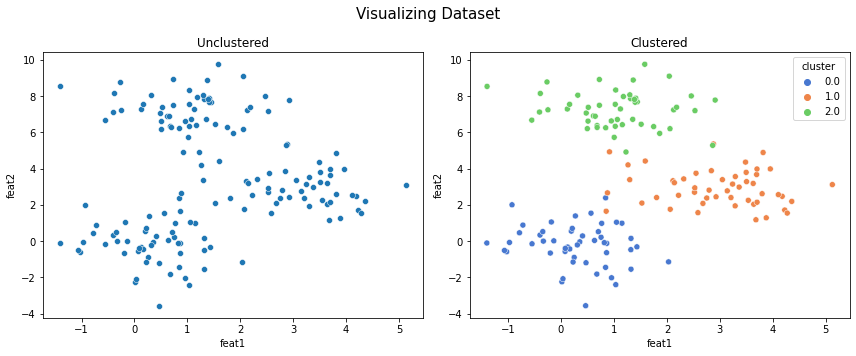

In [3]:
# Visualizing data, creating true label
y_true = np.concatenate([np.zeros(50), np.ones(50)*1, np.ones(50)*2])
X = np.vstack([a, b, c])  
df = pd.DataFrame(X, columns=['feat1', 'feat2'])
df = pd.concat([df, pd.Series(y_true, name='cluster')], axis=1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Visualizing Dataset', fontsize=15)
ax[0].set_title('Unclustered')
sns.scatterplot(x='feat1', y='feat2', data=df, ax=ax[0], palette='muted')
ax[1].set_title('Clustered')
sns.scatterplot(x='feat1', y='feat2', hue='cluster', data=df, ax=ax[1], palette='muted')
fig.tight_layout()
plt.show()

## K-Means

In [4]:
class KMeans():
    '''
    Author: Orvin Demsy
    Date  : 2021-03-26
    
    Implementation of K-Means Algorithm for AlpacaJapan code challenge. K-Means is unsupervised which goal
    is to find n cluster from given data. The cluster is found within some iterations where each iteration distance 
    from centroids to each sample is computed. n cluster is hyperparameter and defined by the user.
    
    PARAMETERS:
    n_cluster : int, number of cluster to be created
    n_iter    : int, number of iteration to find cluster
    
    ATTRIBUTES:
    fitted    : boolean, flag to check whether data is fitted
    labels    : array, predicted cluster labels once data is fitted
    centroids : array, shape (n_cluster x 2) new centroids once data is fitted 
    
    METHODS:
    fit(X)    : fit X into model, return: centroids after iteration
    predict(X): using the new centroids, find predicted label, return: predicted labels
    plot(X)   : plot clustered X, once fitted and predicted labels is found 
    '''
    def __init__(self, n_clusters = 2, n_iter=20):
        if n_clusters < 1:
            raise AssertionError('n_clusters must be > 0')
            
        self.n_clusters  = n_clusters
        self.n_iter      = 1 if not n_iter else n_iter 
        self.fitted      = False
        self.labels      = None
        self.centroids   = None
        
    # === Distance each samples to centroids === #
    def _distance(self, X, centroids):
        X = np.array(X)
        dist = np.array([])
        
        for c in centroids:
            # using euclidean/norm 2 as distance metric
            temp = np.linalg.norm((X - c), 2, 1)[:, None]
            dist = np.hstack([dist, temp]) if len(dist) else temp
        
        # predicting labels
        pred_labels = np.argmin(dist, axis=1)
        
        return pred_labels
    
    # === Compute new centroids === #
    def _compute_centroids(self, X, labels):
        new_cent = np.array([])
        
        for i in range(self.n_clusters):
            temp_cent = X[labels == i].mean(axis=0)
            new_cent  = np.vstack([new_cent, temp_cent]) if len(new_cent) else temp_cent        
        
        return np.array(new_cent)
    
    def fit(self, X):
        if np.array(X).ndim != 2:
            raise AssertionError(f'expect 2D array got {np.array(X).ndim}D instead')
            
        # initialize centroids
        centroids = np.array(X)[np.random.choice(range(len(X)), self.n_clusters)]
        
        for n in range(self.n_iter):
            pred_labels = self._distance(X, centroids)
            centroids   = self._compute_centroids(X, pred_labels)
        
        self.labels    = pred_labels
        self.centroids = centroids
        self.fitted    = True
        
        return self.centroids
        
    def predict(self, X):
        if not self.fitted:
            raise AssertionError('centroids not found KMeans is not fitted yet')
        if np.array(X).ndim != 2:
            raise AssertionError(f'expect 2D array got {np.array(X).ndim}D instead')
        
        return self._distance(X, self.centroids)
    
    def plot(self, X):
        if not self.fitted:
            raise AssertionError('centroids not found KMeans is not fitted yet')
        if np.array(X).ndim != 2:
            raise AssertionError(f'expect 2D array got {np.array(X).ndim}D instead')
        
        fig, ax = plt.subplots()
        sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=self.labels, palette='deep', ax=ax)
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, [f'cluster-{i}' for i in labels])
        plt.show()

In [5]:
# === Code testing === #
kmeans = KMeans(n_clusters=3, n_iter=10)
cent   = kmeans.fit(X)
y_pred = kmeans.predict(X) 

print('Coordinates of centroids at the end of iteration:\n', np.round(cent, 3))
print('')
print('A set of cluster id that each point belongs to:\n', y_pred)

Coordinates of centroids at the end of iteration:
 [[ 0.291 -0.235]
 [ 3.006  2.954]
 [ 0.998  7.257]]

A set of cluster id that each point belongs to:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


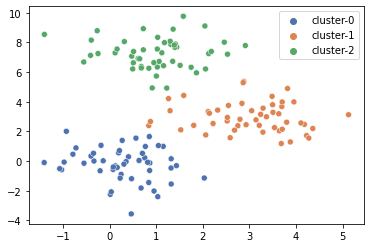

In [6]:
# === Plot fitted X ==== #
kmeans.plot(X)

## Comparing Cluster Visualization Using `y_pred` and `y_true` 

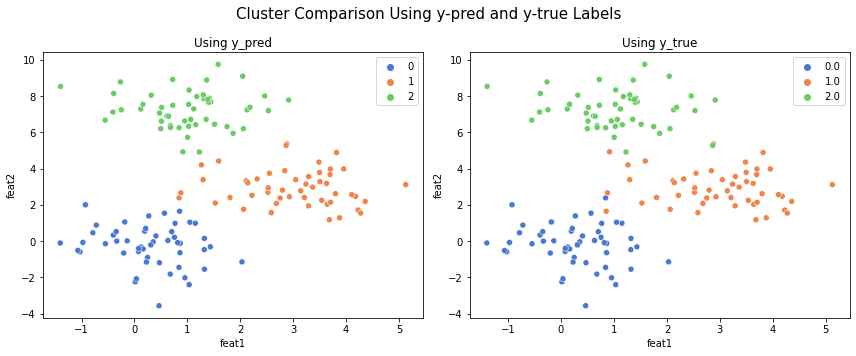

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Cluster Comparison Using y-pred and y-true Labels', fontsize=15)
for ax, y, title in zip(axes.ravel(), (y_pred, y_true), ('y_pred', 'y_true')):
    ax.set_title(f'Using {title}')
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax, palette='muted')
    ax.set(xlabel='feat1', ylabel='feat2')
fig.tight_layout()
plt.show()